In [1]:
import scraper_eod as s
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
import time
from scipy.stats import norm
import seaborn as sns
from yahoo_fin import options
from yahoo_fin.stock_info import *
from yahoo_fin.stock_info import get_data, get_splits
import mibian
import time
m = s.StockMongo()
import indicator as i

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)


In [2]:
a = m.stock_data.options_analisys.find()

In [3]:
a.count()

C:\Users\ander\AppData\Local\Temp/ipykernel_10236/4086721465.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  a.count()


948

In [4]:
b = list(a)

In [5]:
c = pd.DataFrame.from_dict(b)

In [6]:
symbols = m.get_symbols()
symbols.count()/30

C:\Users\ander\AppData\Local\Temp/ipykernel_10236/2713021473.py:2: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  symbols.count()/30


8.633333333333333

<AxesSubplot:>

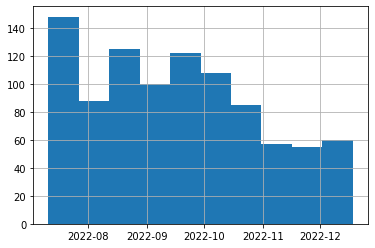

In [7]:
c['date'].hist()

In [8]:
len(c[c['date']<'2022-10-01'])

583

In [9]:
c[(c['sqr_rel_risk']<-0.4)&(c['date']>'2022-10-01')]

,_id,y0,sqr_rel_risk,probability,iv,vix,days_to_strike,ticker,date
652,6343b6ab82f86b59612d562e,0.373046,-0.537321,-1.076657,-1.419616e-02,1.713389e-02,0.009537,LAC,2022-10-10
679,6347aaf671d5db6b58d8a3fe,-0.753037,-1.049087,0.003648,-2.178356e-03,2.795000e-03,0.000326,MGI,2022-10-13
680,6347ab5d71d5db6b58d8a400,-0.223103,-0.411060,-0.456352,4.115275e-03,-2.927704e-02,0.001269,BAND,2022-10-13
722,634e471b2a3203c5893f1c73,1.508337,-0.692061,-1.663628,-1.586392e-02,4.860685e-02,-0.020202,AUPH,2022-10-18
723,634e47812a3203c5893f1c75,2.180349,-0.485568,0.002716,-2.478058e+00,5.575863e-03,-0.000728,AXON,2022-10-18
789,6364ac7626a091aba3cf82b2,-0.459799,-0.537517,-0.082023,-1.008501e-02,2.235339e-03,0.002327,T,2022-11-04
790,6364ae7126a091aba3cf82b4,2.700829,-0.454654,-2.326023,9.452445e-02,-1.444702e-01,-0.002133,UNP,2022-11-04
813,636c974a7f0d9134afe4574c,-0.591780,-0.411916,-0.596459,3.110671e-03,-8.934461e-04,0.000722,ASAN,2022-11-10
822,63708ce40870ae6e1066ce96,-2.770225,-1.658322,4.138072,-2.533135e-02,1.294807e-02,0.021162,CLOV,2022-11-13
878,6385a2f8f134dde6e60407a2,7.796949,-12.335102,-88.370247,-1.096106e-13,1.429121e-14,0.238990,CPRI,2022-11-29


In [ ]:
c[(c['sqr_rel_risk']<-0.4)&(c['date']>'2022-10-01')]